In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/complaints.csv')
df.head()
df.info()
df.columns


C:\Users\saron\AppData\Local\Temp\ipykernel_20872\2649787497.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [2]:
df['Product'].value_counts()
df['Consumer complaint narrative'].isnull().sum()


np.int64(6629041)

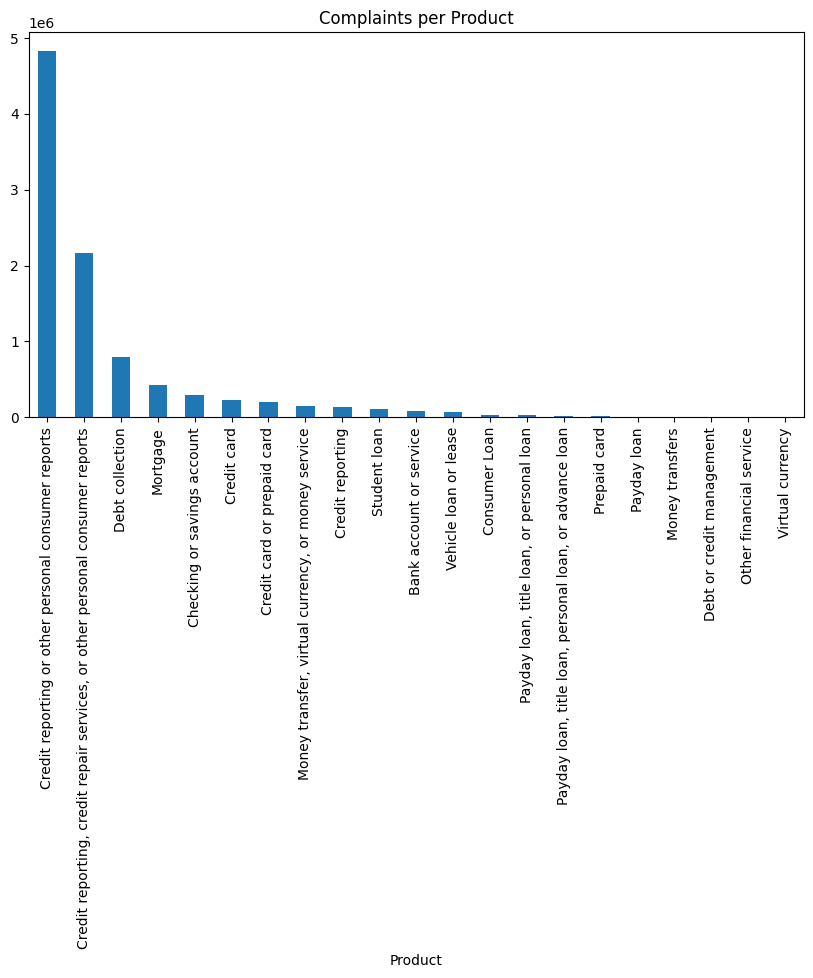

In [3]:
import matplotlib.pyplot as plt

product_counts = df['Product'].value_counts()
product_counts.plot(kind='bar', figsize=(10,5), title='Complaints per Product')
plt.show()


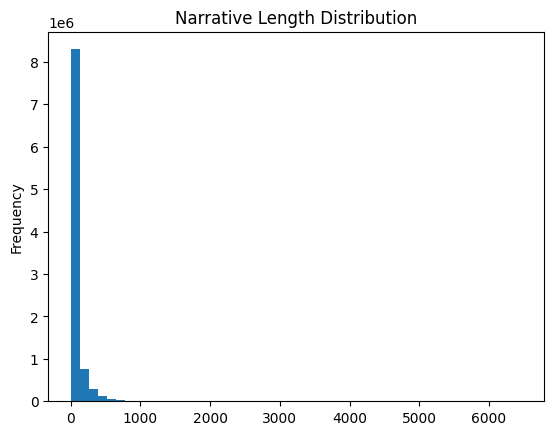

In [4]:
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(x.split()))
df['narrative_length'].describe()

# Visualize
df['narrative_length'].plot(kind='hist', bins=50, title='Narrative Length Distribution')
plt.show()


In [5]:
total = len(df)
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = total - with_narrative

print(f'Total: {total}')
print(f'With narrative: {with_narrative}')
print(f'Without narrative: {without_narrative}')


Total: 9609797
With narrative: 2980756
Without narrative: 6629041


In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/complaints.csv', low_memory=False)

products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later',
    'Savings account',
    'Money transfers'
]

df_filtered = df[df['Product'].isin(products)]
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]

print(df_filtered.head())
print(df_filtered.info())
print(df_filtered['Product'].value_counts())


      Date received      Product                                 Sub-product  \
12237    2025-06-13  Credit card                           Store credit card   
13280    2025-06-12  Credit card  General-purpose credit card or charge card   
13506    2025-06-12  Credit card  General-purpose credit card or charge card   
13955    2025-06-09  Credit card  General-purpose credit card or charge card   
14249    2025-06-09  Credit card  General-purpose credit card or charge card   

                                                 Issue  \
12237                            Getting a credit card   
13280               Other features, terms, or problems   
13506             Incorrect information on your report   
13955  Problem with a purchase shown on your statement   
14249                     Problem when making payments   

                                               Sub-issue  \
12237        Card opened without my consent or knowledge   
13280                                      Other p

In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Optional: remove common boilerplate phrases if any
    return text

df_filtered['clean_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [7]:
import os
print(os.getcwd())

df_filtered.to_csv('../data/filtered_complaints.csv', index=False)


C:\Users\saron\OneDrive\Desktop\kifya\week6\rag-complaint-chatbot\notebooks
